# Abalone

bla bla bla do this later

In [223]:
import pandas as pd

df = pd.read_csv('data/abalone.csv')
df.describe()

,length,diameter,height,whole_height,shucked_height,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [208]:
df.isna().sum()

sex               0
length            0
diameter          0
height            0
whole_height      0
shucked_height    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

In [209]:
df.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_height', 'shucked_height',
       'viscera_weight', 'shell_weight', 'rings'],
      dtype='object')

In [210]:
df = df.drop('sex', axis=1)
df.columns

Index(['length', 'diameter', 'height', 'whole_height', 'shucked_height',
       'viscera_weight', 'shell_weight', 'rings'],
      dtype='object')

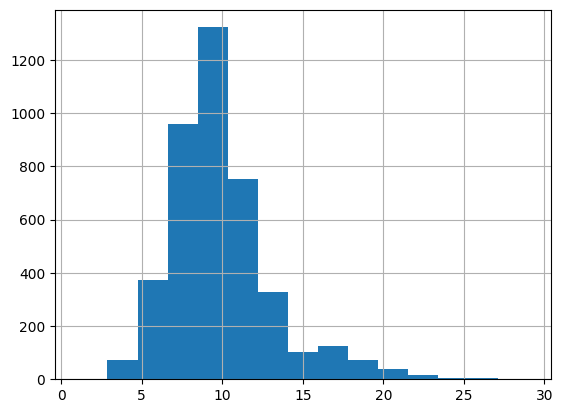

In [211]:
import matplotlib.pyplot as plt

df['rings'].hist(bins=15)
plt.show()

In [212]:
corr_matrix = df.corr()
corr_matrix['rings'].sort_values(ascending=False)

rings             1.000000
shell_weight      0.627574
diameter          0.574660
height            0.557467
length            0.556720
whole_height      0.540390
viscera_weight    0.503819
shucked_height    0.420884
Name: rings, dtype: float64

In [213]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from random import randint

knn_model = KNeighborsRegressor(n_neighbors=3)
random_state = randint(100000, 200000)
X_train, X_test, y_train, y_test = train_test_split(df.drop('rings', axis=1), df['rings'], test_size=0.2, random_state=random_state)
knn_model.fit(X_train, y_train)
train_preds = knn_model.predict(X_train)

mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)

print(f'train_preds RMSE for random state of {random_state}: {rmse:.3f}')

test_preds = knn_model.predict(X_test)

mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)

print(f'test_preds RMSE for random state of {random_state}: {rmse:.3f}')

train_preds RMSE for random state of 139138: 1.697
test_preds RMSE for random state of 139138: 2.325


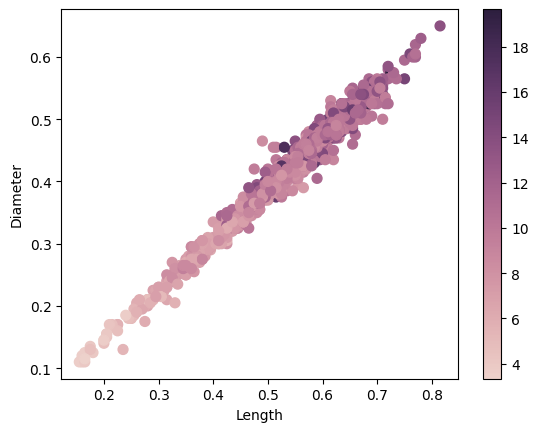

In [214]:
import seaborn as sns
import numpy as np

cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()

# Convert to np array
if not isinstance(X_test, np.ndarray):
    X_test = X_test.to_numpy()

points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap
)

f.colorbar(points)
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.show()

In [221]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_neighbors": range(1,50),
    "weights": ["uniform", "distance"],
}

def gridsearch(model, X_train, y_train, params=params):
    grid = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train)
    return grid

In [222]:
gridsearch = gridsearch(KNeighborsRegressor(), X_train, y_train)

knn_model = KNeighborsRegressor(n_neighbors=gridsearch.best_params_['n_neighbors'])
knn_model.fit(X_train, y_train)
train_preds = knn_model.predict(X_train)

mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)

print(f'train_preds RMSE for random state of {random_state}: {rmse:.3f}')

train_preds RMSE for random state of 139138: 2.093


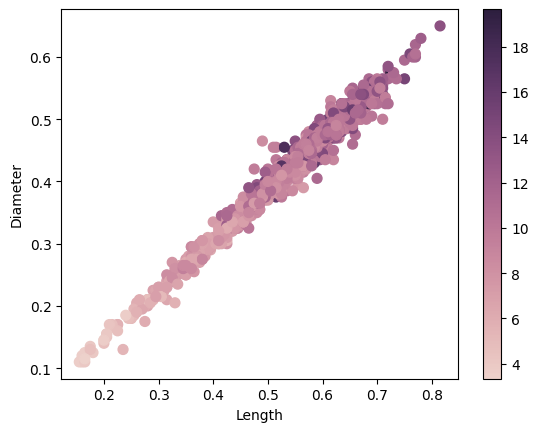

In [218]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()

# Convert to np array
if not isinstance(X_test, np.ndarray):
    X_test = X_test.to_numpy()

points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap
)

f.colorbar(points)
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.show()